In [1]:
# Import packages
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
def get_electricity(start_date="10/10/2022", end_date="10/01/2023", groupBy='M'):
    """Get the weekly electricity as a pandas dataframe. 
    
    start_date: Format "DD/MM/YYYY". Start date.
    end_date: Format "DD/MM/YYYY". End date.
    groupBy: Format 'Y', 'M', or 'D'. Group by year, month or day."""
    
    # Format URL
    DNO = "12" # London area.
    VOLTAGE = "LV" # Low voltage.
    url = f"https://odegdcpnma.execute-api.eu-west-2.amazonaws.com/development/prices?dno={DNO}&voltage={VOLTAGE}&start={start_date}&end={end_date}"
    
    # Hit the API to get the JSON.
    response = urlopen(url)
    data_json = json.loads(response.read())
    
    # Format as a dataframe.
    df = pd.json_normalize(data_json["data"]["data"])
    df = df.drop(columns="unixTimestamp")
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M %d-%m-%Y")
    df.set_index("Timestamp", inplace=True)
    
    # Get mean of each week, month, or day.
    df_grouped = df.resample(groupBy).mean()
    
    return df_grouped

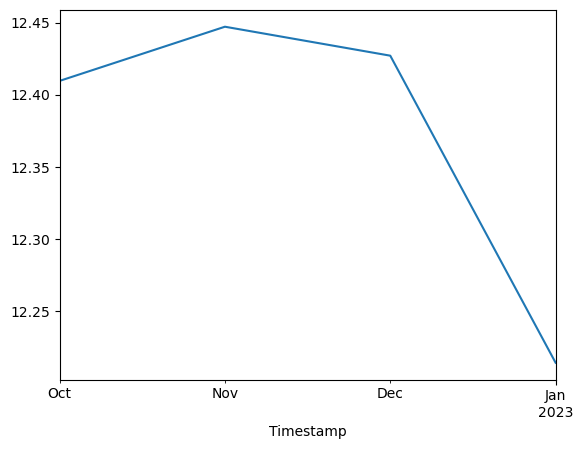

In [5]:
# Call the function.
START_DATE = "10-10-2022"
END_DATE = "10-01-2023"
GROUP_BY = "M"
elec_monthly = get_electricity(START_DATE, END_DATE, GROUP_BY)

# Plot the response.
x = "Date"
y = "Price (£/kWh)"
ax = elec_monthly["Overall"].plot(x=x, y=y)
plt.show()

In [ ]:
# Format URL
DNO = "12" # London area.
VOLTAGE = "LV" # Low voltage.
START_DATE = "10-10-2022"
END_DATE = "10-01-2023"

url = f"https://odegdcpnma.execute-api.eu-west-2.amazonaws.com/development/prices?dno={DNO}&voltage={VOLTAGE}&start={START_DATE}&end={END_DATE}"

In [ ]:
# Hit the API to get the JSON.
response = urlopen(url)
data_json = json.loads(response.read())
print(json.dumps(data_json, indent=2)[0:300])

In [ ]:
# Show the response.
df = pd.json_normalize(data_json["data"]["data"])
df = df.drop(columns="unixTimestamp")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M %d-%m-%Y")
df.set_index("Timestamp", inplace=True)
df

In [ ]:
# Plot the response.
x = "Date/Time"
y = "Price (£/kWh)"
ax = df["Overall"].plot(x=x, y=y)
plt.show()

In [ ]:
# Get mean of each week.
df_weekly = df.resample('M').mean()
df_weekly

In [ ]:
# Plot the response.
x = "Date"
y = "Price (£/kWh)"
ax = df_weekly["Overall"].plot(x=x, y=y)
plt.show()